# Rectangles visualization playground

Importing Code to represent rectangles and plot groups of rectangles

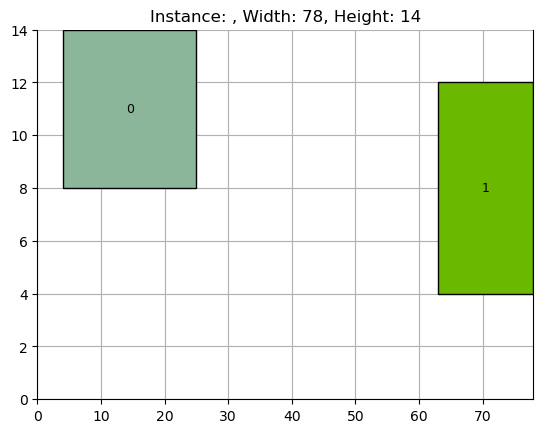

In [1]:
import sys
sys.path.append('../')
from utils.utils import *

plot_rectangles([Rectangle(21,6,4,8), Rectangle(15,8,63,4)])

### VLSI Instance Parser



Testing the parse and the bounds computations for instance 38
height:  5 width:  11
height:  4 width:  11
height:  19 width:  10
height:  7 width:  10
height:  16 width:  9
height:  9 width:  9
height:  5 width:  8
height:  25 width:  7
height:  13 width:  7
height:  12 width:  7
height:  7 width:  7
height:  5 width:  7
height:  24 width:  6
height:  18 width:  6
height:  11 width:  6
height:  10 width:  6
height:  5 width:  6
height:  21 width:  5
height:  23 width:  4
height:  10 width:  4
height:  2 width:  4
height:  2 width:  4
height:  1 width:  4
height:  6 width:  3
height:  5 width:  3
height:  12 width:  2
height:  7 width:  2
height:  1 width:  2
height:  4 width:  1
Tape width:  30


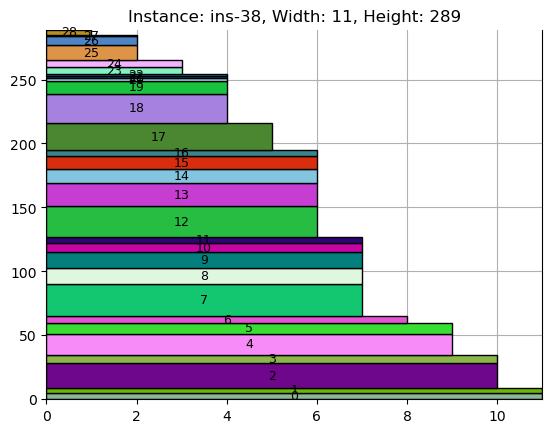

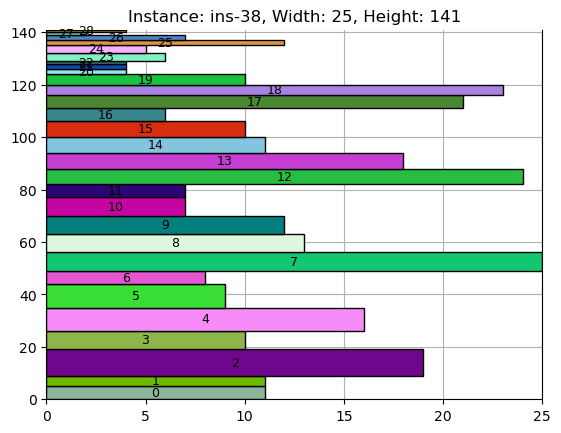

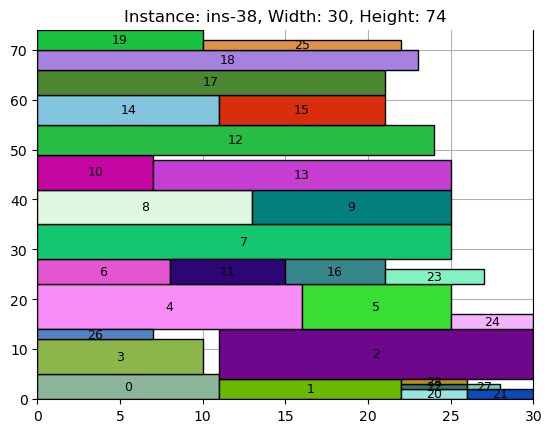

74

In [2]:
# test 
ins_num = 38
print(f"Testing the parse and the bounds computations for instance {ins_num}")
instance = VLSI_Instance(f'./instances/ins-{ins_num}.txt')

for r in instance.rectangles:
  print("height: ", r.height, "width: ", r.width)

print("Tape width: ", instance.W)
instance.H_UB_naive(plot=True)
instance.H_UB_rotation(plot=True)
instance.H_UB_BL(plot=True)

# CP results table

In [3]:
df_base_cp_chuffed = read_reached_bounds("./out/cp/base/chuffed",1,40)
df_base_cp_ortools = read_reached_bounds("./out/cp/base/or-tools",1,40)
df_base_cp = pd.merge(df_base_cp_chuffed, df_base_cp_ortools, left_index=True, right_index=True)
df_base_cp = df_base_cp.set_axis(['Chuffed (base)', 'Or-Tools (base)'], axis='columns', copy=False)

df_sb_cp_chuffed = read_reached_bounds("./out/cp/base-sb/chuffed",1,40)
df_sb_cp_ortools = read_reached_bounds("./out/cp/base-sb/or-tools",1,40)
df_sb_cp = pd.merge(df_sb_cp_chuffed, df_sb_cp_ortools, left_index=True, right_index=True)
df_sb_cp = df_sb_cp.set_axis(['Chuffed (SB)', 'Or-Tools (SB)'], axis='columns', copy=False)

df_rot_chuffed = read_reached_bounds("./out/cp/rotations/chuffed",1,40)
df_rot_ortools = read_reached_bounds("./out/cp/rotations/or-tools",1,40)
df_rot_cp = pd.merge(df_rot_chuffed, df_rot_ortools, left_index=True, right_index=True)
df_rot_cp = df_rot_cp.set_axis(['Chuffed (rotations)', 'Or-Tools (rotations)'], axis='columns', copy=False)

df_rot_sb_chuffed = read_reached_bounds("./out/cp/rotations-sb/chuffed",1,40)
df_rot_sb_ortools = read_reached_bounds("./out/cp/rotations-sb/or-tools",1,40)
df_rot_sb_cp = pd.merge(df_rot_sb_chuffed, df_rot_sb_ortools, left_index=True, right_index=True)
df_rot_sb_cp = df_rot_sb_cp.set_axis(['Chuffed (rotations-SB)', 'Or-Tools (rotations-SB)'], axis='columns', copy=False)


df_cp = pd.merge(df_base_cp, df_sb_cp, left_index=True, right_index=True)
df_cp = pd.merge(df_cp, df_rot_cp, left_index=True, right_index=True)
df_cp = pd.merge(df_cp, df_rot_sb_cp, left_index=True, right_index=True)

print(df_cp)
df_cp.to_csv('./tabs/cp_benchmark.csv', index_label="instance")


   Chuffed (base) Or-Tools (base) Chuffed (SB) Or-Tools (SB)  \
1          8 BOLD          8 BOLD       8 BOLD        8 BOLD   
2          9 BOLD          9 BOLD       9 BOLD        9 BOLD   
3         10 BOLD         10 BOLD      10 BOLD       10 BOLD   
4         11 BOLD         11 BOLD      11 BOLD       11 BOLD   
5         12 BOLD         12 BOLD      12 BOLD       12 BOLD   
6         13 BOLD         13 BOLD      13 BOLD       13 BOLD   
7         14 BOLD         14 BOLD      14 BOLD       14 BOLD   
8         15 BOLD         15 BOLD      15 BOLD       15 BOLD   
9         16 BOLD         16 BOLD      16 BOLD       16 BOLD   
10        17 BOLD         17 BOLD      17 BOLD       17 BOLD   
11        18 BOLD         18 BOLD      18 BOLD       18 BOLD   
12        19 BOLD         19 BOLD      19 BOLD       19 BOLD   
13        20 BOLD         20 BOLD      20 BOLD       20 BOLD   
14        21 BOLD         21 BOLD      21 BOLD       21 BOLD   
15        22 BOLD         22 BOLD      2

# LP results table

In [4]:
df_base_lp_gurobi = read_reached_bounds("./out/lp/base/gurobi",1,40)
df_base_lp_scip = read_reached_bounds("./out/lp/base/scip",1,40)
df_base_lp = pd.merge(df_base_lp_gurobi, df_base_lp_scip, left_index=True, right_index=True)
df_base_lp = df_base_lp.set_axis(['Gurobi (base)', 'Scip (base)'], axis='columns', copy=False)

df_sb_lp_gurobi = read_reached_bounds("./out/lp/base-sb/gurobi",1,40)
df_sb_lp_scip = read_reached_bounds("./out/lp/base-sb/scip",1,40)
df_sb_lp = pd.merge(df_sb_lp_gurobi, df_sb_lp_scip, left_index=True, right_index=True)
df_sb_lp = df_sb_lp.set_axis(['Gurobi (SB)', 'Scip (SB)'], axis='columns', copy=False)

df_rot_gurobi = read_reached_bounds("./out/lp/rotations/gurobi",1,40)
df_rot_scip = read_reached_bounds("./out/lp/rotations/scip",1,40)
df_rot_lp = pd.merge(df_rot_gurobi, df_rot_scip, left_index=True, right_index=True)
df_rot_lp = df_rot_lp.set_axis(['Gurobi (rot)', 'Scip (rot)'], axis='columns', copy=False)

df_rot_sb_gurobi = read_reached_bounds("./out/lp/rotations-sb/gurobi",1,40)
df_rot_sb_scip = read_reached_bounds("./out/lp/rotations-sb/scip",1,40)
df_rot_sb_lp = pd.merge(df_rot_sb_gurobi, df_rot_sb_scip, left_index=True, right_index=True)
df_rot_sb_lp = df_rot_sb_lp.set_axis(['Gurobi(rot-SB)', 'Scip(rot-SB)'], axis='columns', copy=False)


df_lp = pd.merge(df_base_lp, df_sb_lp, left_index=True, right_index=True)
df_lp = pd.merge(df_lp, df_rot_lp, left_index=True, right_index=True)
df_lp = pd.merge(df_lp, df_rot_sb_lp, left_index=True, right_index=True)

print(df_lp)
df_lp.to_csv('./tabs/lp_benchmark.csv', index_label="instance")


   Gurobi (base) Scip (base) Gurobi (SB)   Scip (SB) Gurobi (rotations)  \
1         8 BOLD      8 BOLD      8 BOLD      8 BOLD             8 BOLD   
2         9 BOLD      9 BOLD      9 BOLD      9 BOLD             9 BOLD   
3        10 BOLD     10 BOLD     10 BOLD     10 BOLD            10 BOLD   
4        11 BOLD     11 BOLD     11 BOLD     11 BOLD            11 BOLD   
5        12 BOLD     12 BOLD     12 BOLD     12 BOLD            12 BOLD   
6        13 BOLD     13 BOLD     13 BOLD     13 BOLD            13 BOLD   
7        14 BOLD     14 BOLD     14 BOLD     14 BOLD            14 BOLD   
8        15 BOLD     15 BOLD     15 BOLD     15 BOLD            15 BOLD   
9        16 BOLD     16 BOLD     16 BOLD     16 BOLD            16 BOLD   
10       17 BOLD     17 BOLD     17 BOLD     17 BOLD            17 BOLD   
11       18 BOLD          19     18 BOLD          19            18 BOLD   
12       19 BOLD     19 BOLD     19 BOLD     19 BOLD            19 BOLD   
13       20 BOLD     20 B

# SAT results table

In [5]:
#TODO check
df_base_sat = read_reached_bounds("./out/sat/base",1,40)
df_base_sat = df_base_sat.set_axis(['Z3 (base)'], axis='columns', copy=False)

df_sb_sat = read_reached_bounds("./out/sat/base-sb",1,40)
df_sb_sat = df_sb_sat.set_axis(['Z3 (SB)'], axis='columns', copy=False)

df_rot_sat = read_reached_bounds("./out/sat/rotations",1,40)
df_rot_sat = df_rot_sat.set_axis(['Z3 (rotations)'], axis='columns', copy=False)

df_rot_sb_sat = read_reached_bounds("./out/sat/rotations-sb",1,40)
df_rot_sb_sat = df_rot_sb_sat.set_axis(['Z3 (rotations-SB)'], axis='columns', copy=False)


df_sat = pd.merge(df_base_sat, df_sb_sat, left_index=True, right_index=True)
df_sat = pd.merge(df_sat, df_rot_sat, left_index=True, right_index=True)
df_sat = pd.merge(df_sat, df_rot_sb_sat, left_index=True, right_index=True)

print(df_sat)
df_sat.to_csv('./tabs/sat_benchmark.csv', index_label="instance")


   Z3 (base)  Z3 (SB) Z3 (rotations) Z3 (rotations-SB)
1     8 BOLD   8 BOLD         8 BOLD            8 BOLD
2     9 BOLD   9 BOLD         9 BOLD            9 BOLD
3    10 BOLD  10 BOLD        10 BOLD           10 BOLD
4    11 BOLD  11 BOLD        11 BOLD           11 BOLD
5    12 BOLD  12 BOLD        12 BOLD           12 BOLD
6    13 BOLD  13 BOLD        13 BOLD           13 BOLD
7    14 BOLD  14 BOLD        14 BOLD           14 BOLD
8    15 BOLD  15 BOLD        15 BOLD           15 BOLD
9    16 BOLD  16 BOLD        16 BOLD           16 BOLD
10   17 BOLD  17 BOLD        17 BOLD           17 BOLD
11   18 BOLD  18 BOLD        18 BOLD           18 BOLD
12   19 BOLD  19 BOLD        19 BOLD           19 BOLD
13   20 BOLD  20 BOLD        20 BOLD           20 BOLD
14   21 BOLD  21 BOLD        21 BOLD           21 BOLD
15   22 BOLD  22 BOLD        22 BOLD           22 BOLD
16   23 BOLD  23 BOLD        23 BOLD           23 BOLD
17   24 BOLD  24 BOLD        24 BOLD           24 BOLD
18   25 BO

# SMT results table

In [6]:
#TODO check
df_base_smt = read_reached_bounds("./out/smt/base",1,40)
df_base_smt = df_base_smt.set_axis(['Z3 (base)'], axis='columns', copy=False)

df_sb_smt = read_reached_bounds("./out/smt/base-sb",1,40)
df_sb_smt = df_sb_smt.set_axis(['Z3 (SB)'], axis='columns', copy=False)

df_rot_smt = read_reached_bounds("./out/smt/rotations",1,40)
df_rot_smt = df_rot_smt.set_axis(['Z3 (rotations)'], axis='columns', copy=False)

df_rot_sb_smt = read_reached_bounds("./out/smt/rotations-sb",1,40)
df_rot_sb_smt = df_rot_sb_smt.set_axis(['Z3 (rotations-SB)'], axis='columns', copy=False)


df_smt = pd.merge(df_base_smt, df_sb_smt, left_index=True, right_index=True)
df_smt = pd.merge(df_smt, df_rot_smt, left_index=True, right_index=True)
df_smt = pd.merge(df_smt, df_rot_sb_smt, left_index=True, right_index=True)

print(df_smt)
df_smt.to_csv('./tabs/smt_benchmark.csv', index_label="instance")


IndexError: list index out of range

In [ ]:
df = pd.merge(df_cp, df_sat, left_index=True, right_index=True)
df = pd.merge(df, df_smt, left_index=True, right_index=True)
df = pd.merge(df, df_lp, left_index=True, right_index=True)
df.to_csv('./tabs/all_benchmarks.csv', index_label="instance")